## Data

Import the data

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Loading the data

In [7]:
# Load the needed data from raw_data
raw_data = pd.read_csv("data\raw_data.csv")
meta = pd.read_csv("data\metadata.csv")



OSError: [Errno 22] Invalid argument: 'data\raw_data.csv'

Checking the amount of missing values

In [4]:
# Isolate the Education column and count the values in each category: Graduate and Not Graduate
Education_total = raw_data['Education'].value_counts()
missing_values_of_Education = meta.loc[meta['Column Name'] == 'Education', 'missing Values'].values[0]
missing_values_of_Education

0

Now we see if the missing data is greater than 10% 

In [5]:
# Calculate the percentage of missing values
total_education = raw_data['Education'].shape[0]
percentage_missing_data = (missing_values_of_Education / total_education) * 100
percentage_missing_data

0.0

## Evaluting the data through the outcome(Loan_Status)

We must see if the data example if the number of education effect the outcome of the data. So we must compare of having Graduated or Not Graduate have any effect from the on the status. 

In [6]:
# NOw we get the percentages of which group got the loans and which ones didn't
Total_loan = raw_data['Loan_Status'].shape[0]

#Cheching the values of Education over the final amount of Loan_Status
graduate_approved = raw_data[(raw_data['Education'] == 'Graduate') & (raw_data['Loan_Status'] == 'Y')]

# Count the number of rows where Education is Graduate and Loan_Status is Y
graduate_approved_count = graduate_approved.shape[0]

# Filter rows where Education is Graduate and Loan_Status is N
graduate_denied = raw_data[(raw_data['Education'] == 'Graduate') & (raw_data['Loan_Status'] == 'N')]

# Count the number of rows where Education is Graduate and Loan_Status is N
graduate_denied_count = graduate_denied.shape[0]



Now we checked on the Not gradute

In [7]:
#Now we redo the steps for when the edution is Not Gradute

#Cheching the values of Education over the final amount of Loan_Status
not_graduate_approved = raw_data[(raw_data['Education'] == 'Not Graduate') & (raw_data['Loan_Status'] == 'Y')]

# Count the number of rows where Education is Not Graduate and Loan_Status is Y
not_graduate_approved_count = not_graduate_approved.shape[0]

# Filter rows where Education is Not Graduate and Loan_Status is N
not_graduate_denied = raw_data[(raw_data['Education'] == 'Not Graduate') & (raw_data['Loan_Status'] == 'N')]

# Count the number of rows where Education is NOt Graduate and Loan_Status is N
not_graduate_denied_count = not_graduate_denied.shape[0]

# Create Pie Chart

Now we see the data through a more direct representation on a pie chart. To see which data is the most visible

In [2]:
# Display the values on the needed chart to show the data
plt.figure(figsize=(12, 12))
plt.pie([graduate_approved_count, graduate_denied_count, not_graduate_approved_count, not_graduate_denied_count], labels=['graduates_approved', 'graduates-denied', 'not graduate-approved', 'not graduate-denied'], colors=['#1F51FF', '#FF3131', '#ADD8E6', '#00FF00'], autopct='%1.1f%%')
plt.title('Distribution of Education Application')
plt.legend(labels=[f"Total number of Graduate who got the loan: {graduate_approved_count}",
                   f"Total number of Not Graduate who got the loan: {not_graduate_approved_count}",
                   f"Total number of Graduate who didn't get the loan: {graduate_denied_count}",
                   f"Total number of Not Graduate who didn't the loan: {not_graduate_denied_count}",
                   f"Total number of missing values: {missing_values_of_Education}",
                   f"The percentage of missing values is {percentage_missing_data:.2f}% "],
                   loc='upper right', facecolor=None)
plt.show()

NameError: name 'plt' is not defined

# Create a Bar-Graph

Now we see the data side by side for better represenation of data

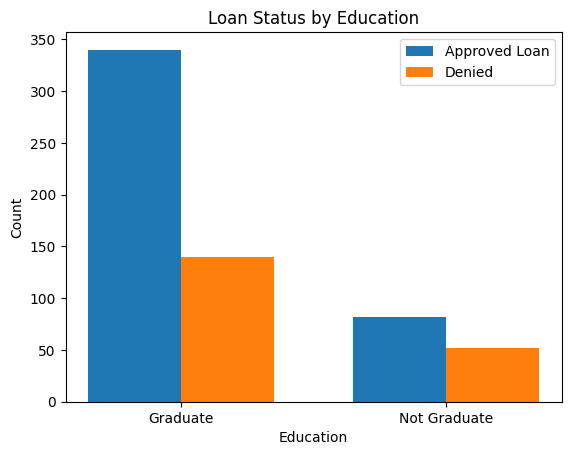

In [9]:
# Data for the bar graph
education = ['Graduate', 'Not Graduate']
approved_counts = [graduate_approved_count, not_graduate_approved_count]
denied_counts = [graduate_denied_count, not_graduate_denied_count]

# Plotting
bar_width = 0.35
index = range(len(education))

fig, ax = plt.subplots()
bars1 = ax.bar(index, approved_counts, bar_width, label='Approved Loan')
bars2 = ax.bar([i + bar_width for i in index], denied_counts, bar_width, label='Denied')

# Adding labels, title, and legend
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Loan Status by Education')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(education)
ax.legend()

plt.show()

With the data evaluation, there are no missing and NaN values within the data. There are two Variables, Graduate for those who have an education, and Not Graduate for those without graduating. The understand of the data allowed for the checking on how much it effects the outcome: Loan_Status. By evaluating how many have a loan approved and denied while having an education and not. This means the data has 4 different outcomes to understand and focus on. 
55.4% of the people are graduates who got the loan, 
22.8% are graduates who were denied for the loan
13.4% are not graduated and got the loan
8.5% are not graduates who did not get approved for the loan. 

This shows that if you’re a graduate you have a high chance of being approved
